In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = "Desktop/dm1/movie/ratings.dat"  
ratings = pd.read_csv(filename, header=None, sep="::", names=["UserID",  "MovieID",  "Rating",  "Datetime"], engine="python")


In [52]:
print(ratings.head()) #查看矩阵前五行

   UserID  MovieID  Rating   Datetime
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [7]:
mask=np.random.rand(len(ratings))<.9 #9:1分配训练测试集
train_ratings=ratings[mask]
test_ratings=ratings[~mask]
print("train_set_size =",train_ratings.shape)
print("test_set_size =",test_ratings.shape)
print(len(train_ratings))
print(len(test_ratings))

train_set_size = (900395, 4)
test_set_size = (99814, 4)
900395
99814


In [8]:
#数据预处理
users=ratings.UserID.unique()
movies=ratings.MovieID.unique()
uidx={uid: id for id,uid in enumerate(users)} #uidx=0-6039
midx={mid: id for id,mid in enumerate(movies)} #0-3075
M = len(users)             # 用户数量
N = len(movies)  # 电影数量

In [9]:
print(M)
print(N)

6040
3706


In [10]:
A=np.zeros((M,N)) #邻接矩阵A
print(A.shape)
for _, rating in train_ratings.iterrows():
    if(rating.Rating>3):
        A[uidx[rating.UserID], midx[rating.MovieID]]=1

(6040, 3706)


In [11]:
k_user =A.sum(axis=1)
k_movie =A.sum(axis=0)

In [12]:
print(k_user)

[ 40.  67.  31. ...  13.  85. 194.]


In [13]:
A_test =np.zeros((M,N),dtype=np.int64)
print(A.shape)
for _, rating in test_ratings.iterrows():
    if(rating.Rating>3): #按评分大于3分类
        A_test[uidx[rating.UserID], midx[rating.MovieID]]=1

(6040, 3706)


In [14]:
print(A)
#W矩阵
tmp1=A/k_user.reshape((-1,1)) #reshape(-1,1)转成一列
tmp1[np.isnan(tmp1)]=0
tmp2=np.dot(tmp1.T,A) #矩阵乘法
print(tmp2.shape,k_movie.shape)
W=tmp2/k_movie
W[np.isnan(W)]=0

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(3706, 3706) (3706,)


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [15]:
print(tmp1)

[[0.025      0.         0.         ... 0.         0.         0.        ]
 [0.01492537 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01176471 ... 0.         0.         0.        ]
 [0.00515464 0.         0.         ... 0.         0.         0.        ]]


In [31]:

print(W)
        

[[1.77678393e-02 1.66226258e-03 2.19951662e-03 ... 0.00000000e+00
  9.25925926e-03 0.00000000e+00]
 [2.96571078e-04 1.06381538e-02 7.92111449e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.38016956e-04 1.48969108e-03 1.13172634e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.79828139e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.25925926e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.19672131e-03]]


In [32]:
F=np.dot(W, A.T).T #F矩阵
F[A==1]=0


F_sort_index = np.argsort(F,axis=1)
F_sort = np.zeros((M, N)) 
for i in range(M): 
    for j in range(N):
        F_sort[i,F_sort_index[i][j]] = N - j

L = N - k_user
print(F.shape,F_sort.shape,L.shape)
print(F)

(6040, 3706) (6040, 3706) (6040,)
[[0.00000000e+00 2.91265076e-02 5.54979691e-02 ... 0.00000000e+00
  1.74289024e-04 1.76128238e-05]
 [0.00000000e+00 2.59956687e-02 6.35886805e-02 ... 0.00000000e+00
  1.40395020e-04 5.15501613e-05]
 [7.64950237e-02 1.27931109e-02 2.34821106e-02 ... 0.00000000e+00
  1.55966936e-04 3.27441527e-05]
 ...
 [3.59547791e-02 6.25409353e-03 1.71314465e-02 ... 0.00000000e+00
  4.83007786e-06 2.19751242e-05]
 [2.42751792e-01 4.39608394e-02 0.00000000e+00 ... 0.00000000e+00
  2.38045622e-04 1.24499704e-04]
 [0.00000000e+00 8.35755520e-02 1.84366391e-01 ... 0.00000000e+00
  1.50224123e-04 5.63494840e-04]]


In [30]:
r=np.average(F_sort*A_test,axis=1)/L #平均推荐相对位置
r_avg=np.average(r)

print("r_avg=",r_avg)

r_avg= 0.00025479968049156365


AUC= 0.6529668363358407


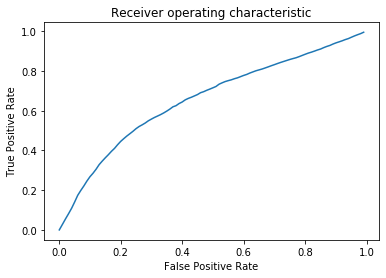

In [25]:
#ROC curve
T_=np.sum(A_test)#证样本数
F_=np.sum(A_test==False)#负样本
TPR,FPR=[],[]
for threshold in np.arange(0, 1, 0.01): 
    F_out = F_sort<(N*threshold)
    TP = np.sum(A_test & F_out)
    FP = np.sum(~A_test & F_out)
    TPR.append(TP/T_)
    FPR.append(FP/F_)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
AUC=np.sum([tpr*0.01 for tpr in TPR])#roc曲线下面积
print("AUC=",AUC)